<a href="https://colab.research.google.com/github/Yunjimin/GUI-project/blob/master/wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

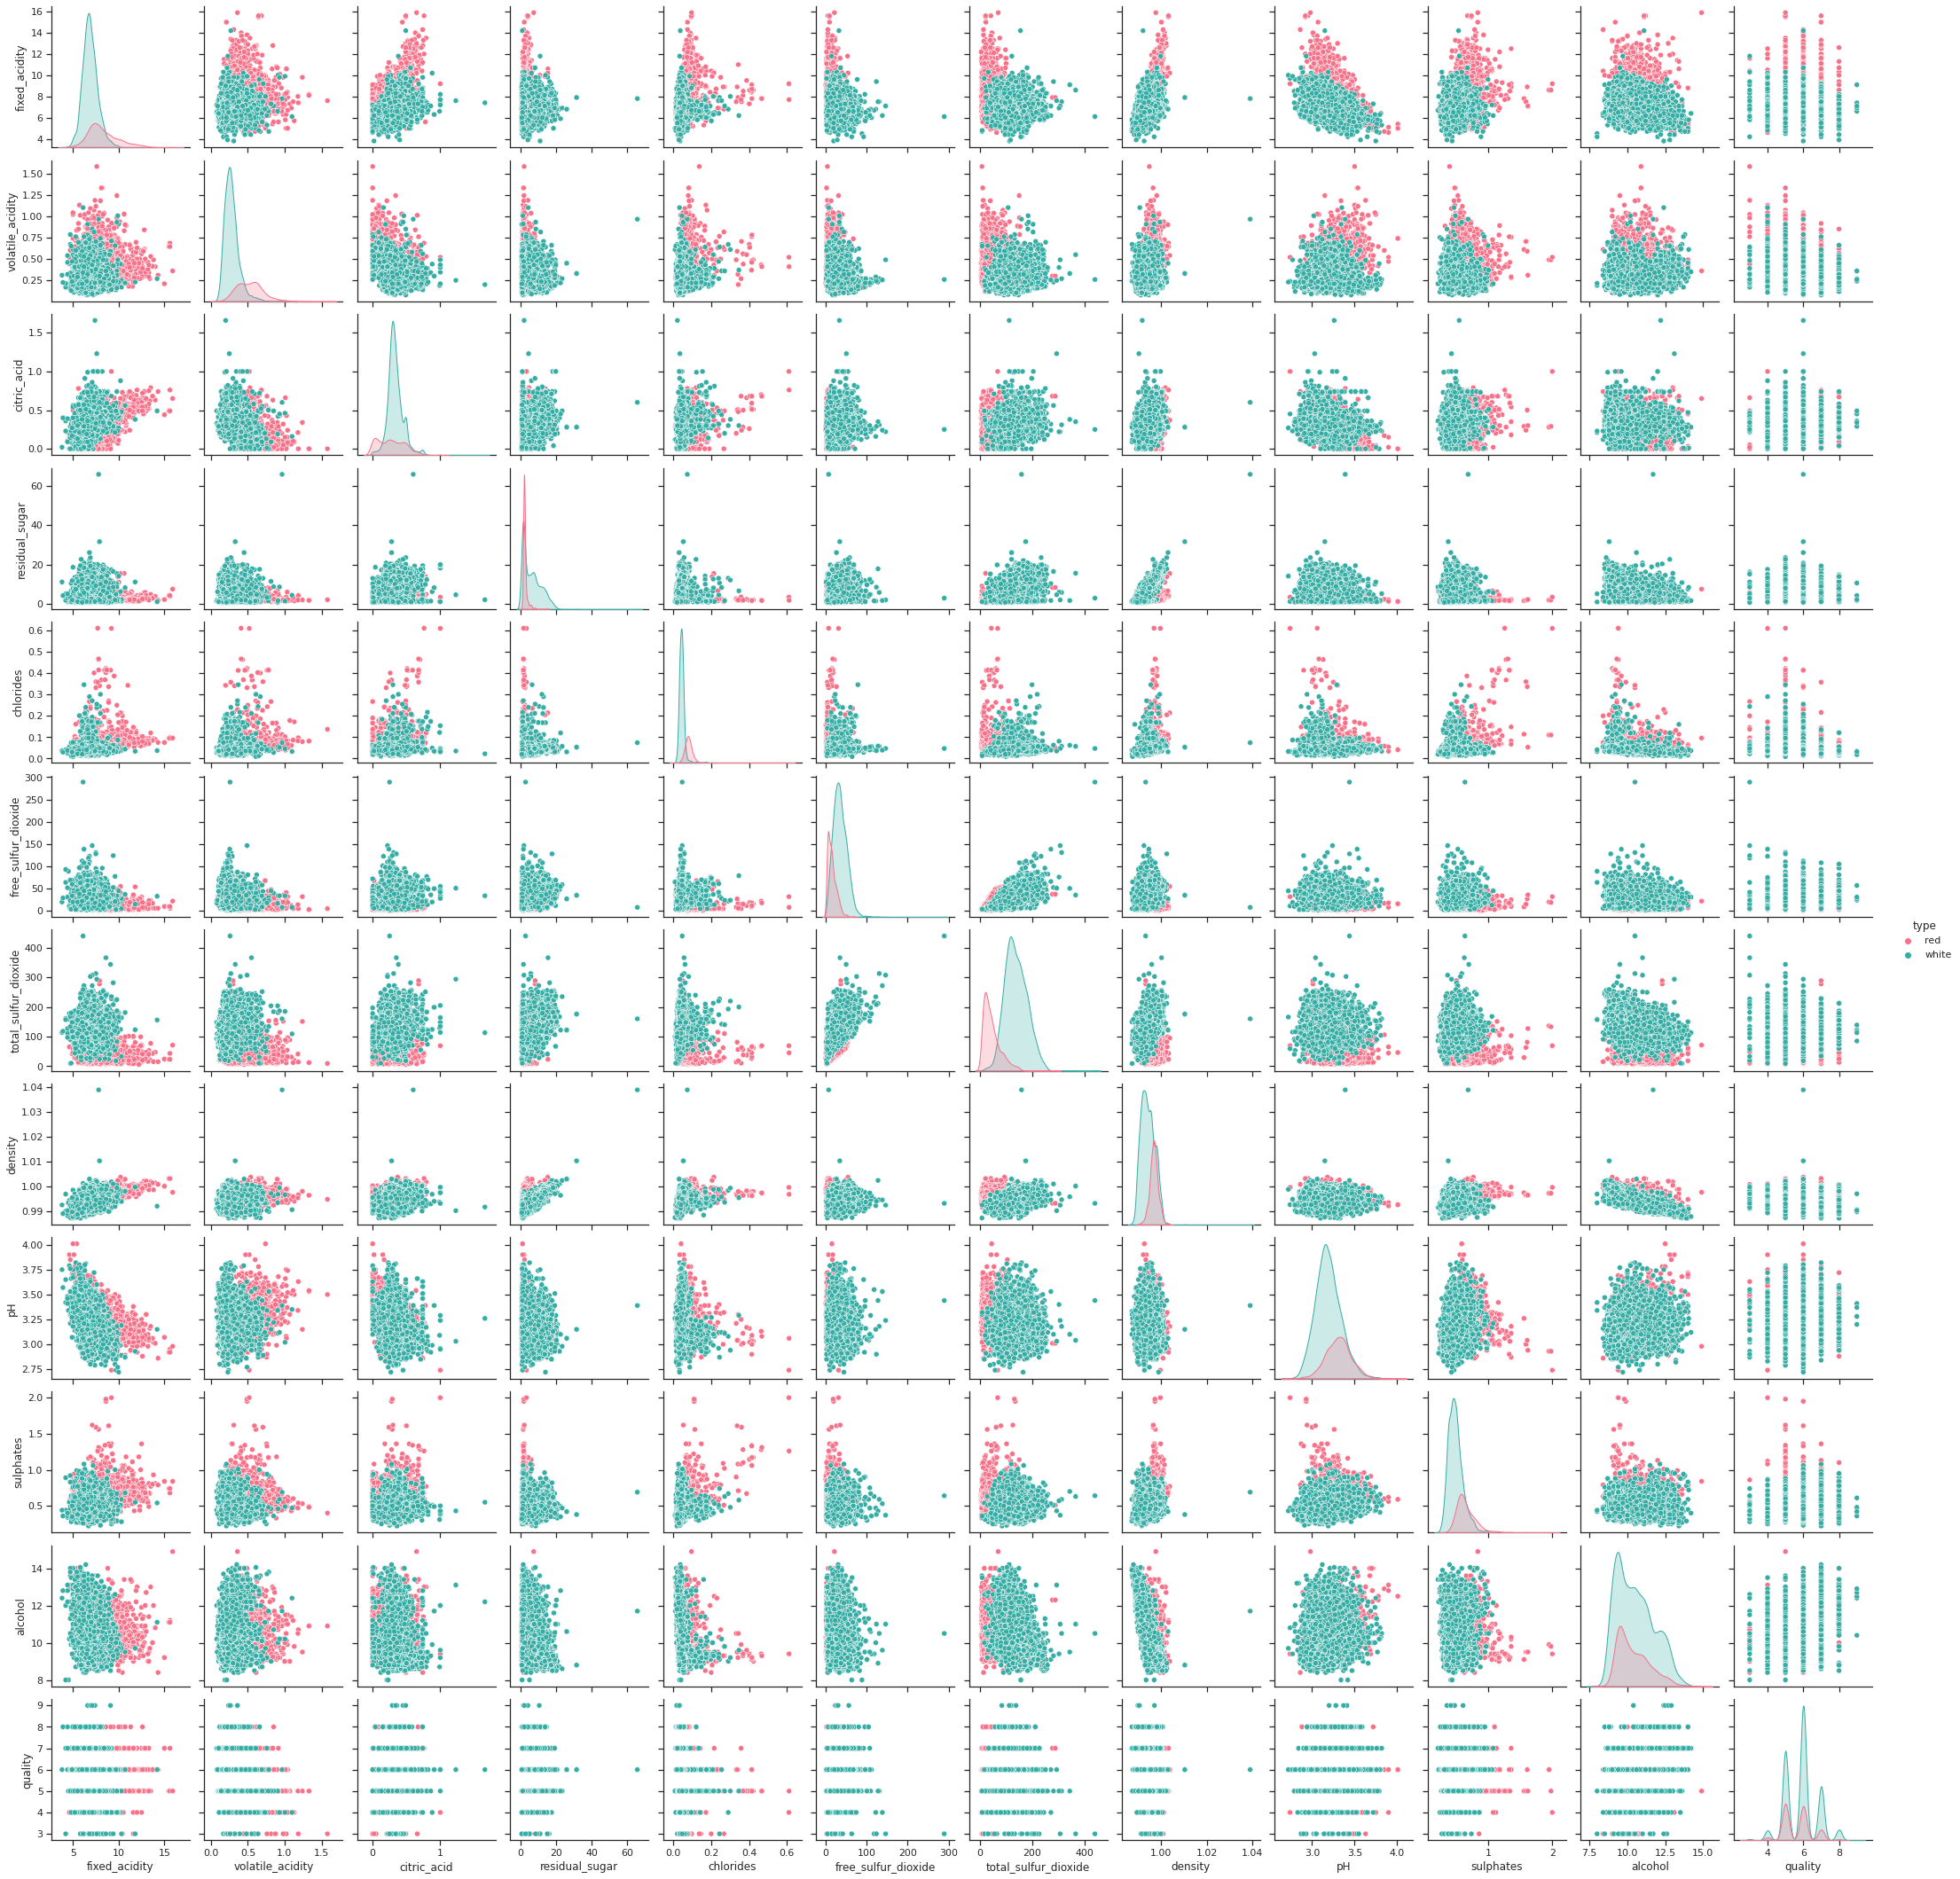

In [1]:
%matplotlib inline
import seaborn as sns #그래프를 시각화
import pandas as pd #다른 데이터타입을 담을 수 있는 테이블
import numpy as np #같은 데이터타입의 다차원 배열


redwine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ";", header = 0)
redwine["type"] ="red"  # type red 추가

whitewine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ";", header = 0)
whitewine["type"] ="white"

wine = redwine.append(whitewine)
wine.columns = wine.columns.str.replace(" ", "_")

sns.set(style="ticks", color_codes=True)  # ticks 는 여러가지 스타일 중 하나. 
g = sns.pairplot(wine, hue="type", palette="husl") # pairplot 쌍관계그래프      


In [10]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [23]:
from sklearn.preprocessing import LabelEncoder

X = wine.iloc[:,0:12].values # fixed_acidity ~ quality
y = wine.iloc[:,12].values # type

encoder =  LabelEncoder() #레이블인코딩 생성
y1 = encoder.fit_transform(y) # 품종 이름들을 숫자로 변환
Y = pd.get_dummies(y1).values
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [24]:
X

array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  5.  ],
       [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  5.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])

In [25]:
from sklearn.model_selection import train_test_split  #사이킷런, 학습시키기
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((5197, 12), (1300, 12), (5197, 2), (1300, 2))

In [29]:
from keras.models import Sequential # 하나의 입력텐서, 하나의 출력텐서가 있을 때 사용, 모델에 다중입력,다중출력이 있으면 부적합
from keras.layers import Dense #보통의 밀집 연결 신경망 레이어.
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,input_shape=(12,),activation='relu')) #activation = 사용할 활성화 함수 설정,
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='binary_crossentropy', #손실함수= 실제결과와 모델결과의 차이, 학습할수록 줄어들어야 함. 손실함수중 하나
              optimizer='Adam',  #학습속도를 빠르고 안정적이게, adam은 옵티마이저 매개변수중 하나
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                832       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 130       
Total params: 5,122
Trainable params: 5,122
Non-trainable params: 0
_________________________________________________________________


In [30]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100) #훈련 시작

Epoch 1/100
163/163 [==============================] - 3s 4ms/step - loss: 0.5522 - accuracy: 0.8338 - val_loss: 0.1933 - val_accuracy: 0.9323
Epoch 2/100
163/163 [==============================] - 0s 3ms/step - loss: 0.1961 - accuracy: 0.9330 - val_loss: 0.1680 - val_accuracy: 0.9431
Epoch 3/100
163/163 [==============================] - 0s 3ms/step - loss: 0.1871 - accuracy: 0.9309 - val_loss: 0.1517 - val_accuracy: 0.9477
Epoch 4/100
163/163 [==============================] - 0s 3ms/step - loss: 0.1597 - accuracy: 0.9402 - val_loss: 0.1356 - val_accuracy: 0.9546
Epoch 5/100
163/163 [==============================] - 0s 3ms/step - loss: 0.1433 - accuracy: 0.9511 - val_loss: 0.1663 - val_accuracy: 0.9446
Epoch 6/100
163/163 [==============================] - 0s 3ms/step - loss: 0.1397 - accuracy: 0.9498 - val_loss: 0.1177 - val_accuracy: 0.9546
Epoch 7/100
163/163 [==============================] - 0s 3ms/step - loss: 0.1179 - accuracy: 0.9622 - val_loss: 0.1400 - val_accuracy: 0.9500

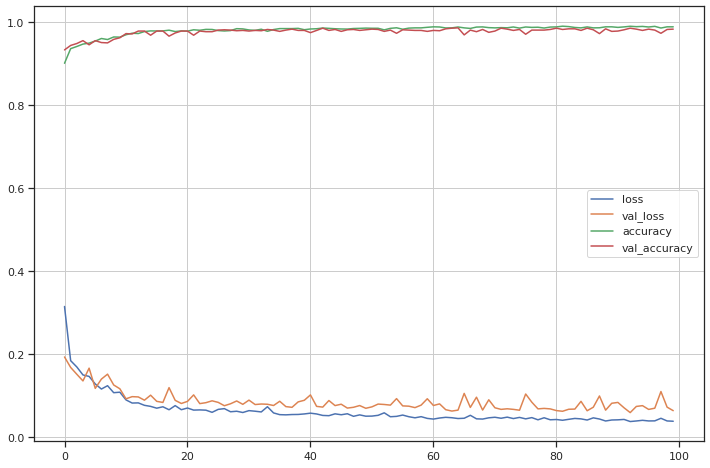

In [31]:
import matplotlib.pyplot as plt #데이터 시각화
%matplotlib inline

plt.figure(figsize=(12,8)) #그림의 가로세로 크기
plt.plot(hist.history['loss']) #매 훈련 손실값  
plt.plot(hist.history['val_loss']) # 매 검증 손실값
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])  #범례표시
plt.grid() #격자표시
plt.show()

In [32]:
loss, accuracy = model.evaluate(X_test, y_test)  #손실 및 정확도 측정
print("loss = {:.2f}".format(loss))
print("Accuracy = {:.2f}".format(accuracy))

41/41 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9823
loss = 0.06
Accuracy = 0.98


In [33]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       297
           1       0.98      1.00      0.99      1003

    accuracy                           0.98      1300
   macro avg       0.98      0.97      0.97      1300
weighted avg       0.98      0.98      0.98      1300

[[279  18]
 [  5 998]]


In [34]:
test_set = np.array([[7.9,0.43,0.21,1.6,0.106,10,37,0.9966,3.17,0.91,9.5,5]])
print("Predicted target name: {}".format(
    wine['type'].unique()[model.predict_classes(test_set)]))

Predicted target name: ['red']


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [35]:
test_set = np.array([[7.2, 0.24, 0.27, 1.4, 0.038, 31, 122, 0.9927, 3.15,0.46,10.3, 6]])
print("Predicted target name: {}".format(
    wine['type'].unique()[model.predict_classes(test_set)]))

Predicted target name: ['white']


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [36]:
test_set = np.array([[6, 0.24, 0.27, 1.4, 0.096, 31, 33, 0.9927, 3.15,0.46,10.3, 6]])
print("Predicted target name: {}".format(
    wine['type'].unique()[model.predict_classes(test_set)]))

Predicted target name: ['red']


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
